# Topic modelling

More than just text analysis, it's a statistical technique

Find words across documents, common themes, common topics, more than once, more than one document. Group according to categories which seem semantically useful.

- LDA: Latent Dirichlet Allocation - tries to find models within your dataset, infer these.


Topic selection of words which co-occur across as set of documents



In [83]:
import nltk
import pandas as pd
from nltk.corpus import reuters
#nltk.download('reuters')
from nltk.corpus import brown
nltk.download('brown')
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package brown to /Users/james/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [84]:
#filenames = [reuters.fileids(categories=cat) for cat in ['gold', 'coffee', 'income']]
#filenames = [brown.fileids(categories=cat) for cat in ['fiction', 'government', 'reviews']]
filenames = [brown.fileids(categories=cat) for cat in ['romance', 'religion', 'hobbies']]



In [86]:
#reutersRaw = [[reuters.raw(fileids=fns) for fn in fns[:10]] for fns in filenames]


reutersRaw = [[' '.join(brown.words(fileids=fn)) for fn in fns[:10]] for fns in filenames] 

In [93]:
reutersDocs = []
for collection in reutersRaw:
    for doc in collection:
        reutersDocs.append(doc)
        
len(reutersDocs) 

30

In [94]:
countVectorizer = CountVectorizer(stop_words='english', max_features=1000)

<30x5131 sparse matrix of type '<class 'numpy.int64'>'
	with 68770 stored elements in Compressed Sparse Row format>

In [98]:
reutersCounts = countVectorizer.fit_transform(reutersDocs)
reutersCounts

<30x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6268 stored elements in Compressed Sparse Row format>

In [100]:
wordLabels = countVectorizer.get_feature_names()

In [101]:
reutersLabels = [doc[:50] for doc in reutersDocs]

In [102]:
wordLabelsNoNums = [wordLabel for wordLabel in wordLabels if wordLabel.isalpha()] 

In [103]:
pd.DataFrame(reutersCounts.todense(), index=reutersLabels, columns=wordLabelsNoNums).head()

ValueError: Shape of passed values is (30, 1000), indices imply (30, 981)

In [137]:
countVectorizer = CountVectorizer(stop_words='english', vocabulary=wordLabelsNoNums,min_df=5, max_df=0.7)
reutersCounts = countVectorizer.fit_transform(reutersDocs)
wordLabelsNoNums = [wordLabel for wordLabel in wordLabels if wordLabel.isalpha()] 

In [138]:
pd.DataFrame(reutersCounts.todense(), index=reutersLabels, columns=wordLabelsNoNums).head()

able  accept  accepted  \
They neither liked nor disliked the Old Man . To t     0       0         0   
People came in and out all evening to see the baby     0       0         0   
`` Thrifty of her to use it up . Unusual in a case     0       0         0   
`` He must have forgiven me '' , Henrietta murmure     1       0         0   
The Momoyama family had come from Miyagi Prefectur     0       0         1   

                                                    according  action  \
They neither liked nor disliked the Old Man . To t          0       0   
People came in and out all evening to see the baby          0       0   
`` Thrifty of her to use it up . Unusual in a case          0       0   
`` He must have forgiven me '' , Henrietta murmure          0       0   
The Momoyama family had come from Miyagi Prefectur          0       0   

                                                    actions  active  actually  \
They neither liked nor disliked the Old Man . To t        0       0         0   
People came in and out all evening to see the baby        0       0         0   
`` Thrifty of her to use it up . Unusual in a case        0       0         0   
`` He must have forgiven me '' , Henrietta murmure        2       0         0   
The Momoyama family had come from Miyagi Prefectur        0       0         2   

                                                    adam  added  ...  worry  \
They neither liked nor disliked the Old Man . To t     0      0  ...      0   
People came in and out all evening to see the baby     0      0  ...      2   
`` Thrifty of her to use it up . Unusual in a case     0      0  ...      0   
`` He must have forgiven me '' , Henrietta murmure     0      0  ...      0   
The Momoyama family had come from Miyagi Prefectur     0      0  ...      0   

                                                    wouldn  yang  year  years  \
They neither liked nor disliked the Old Man . To t       2     0     0      0   
People came in and out all evening to see the baby       4     0     0      0   
`` Thrifty of her to use it up . Unusual in a case       1     0     1      1   
`` He must have forgiven me '' , Henrietta murmure       0     0     0      3   
The Momoyama family had come from Miyagi Prefectur       1     0     0      1   

                                                    yellow  yes  yin  york  \
They neither liked nor disliked the Old Man . To t       4    0    0     0   
People came in and out all evening to see the baby       0    0    0     1   
`` Thrifty of her to use it up . Unusual in a case       0    5    0     0   
`` He must have forgiven me '' , Henrietta murmure       0    0    0     0   
The Momoyama family had come from Miyagi Prefectur       0    1    0     0   

                                                    young  
They neither liked nor disliked the Old Man . To t      0  
People came in and out all evening to see the baby      1  
`` Thrifty of her to use it up . Unusual in a case      2  
`` He must have forgiven me '' , Henrietta murmure      3  
The Momoyama family had come from Miyagi Prefectur     10  

[5 rows x 981 columns]

In [139]:
lda = LatentDirichletAllocation(n_components=3)

n_components is the number of topics, higher will find more


In [140]:
ldaOut = lda.fit_transform(reutersCounts)

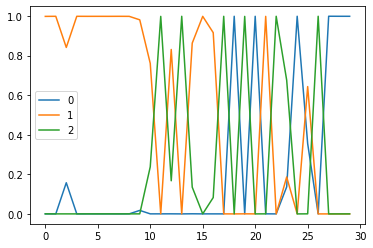

In [141]:
pd.DataFrame(ldaOut).plot()

In [142]:
topicWordMatrix = pd.DataFrame(lda.components_, index=['topic 1', 'topic 2', 'topic 3'], columns=wordLabelsNoNums)

Showing us probablity of each word appearing in each topic

In [143]:
topicWordMatrix.loc['topic 3'].sort_values(ascending=False).head(15)

god         44.962374
man         35.586905
aircraft    35.333326
death       34.082739
world       27.847896
number      25.738551
history     24.311638
long        23.551805
frame       22.344039
square      22.343262
bar         22.342305
locking     22.339480
nuclear     22.320500
position    22.303810
time        22.222012
Name: topic 3, dtype: float64

In [144]:
topicWordMatrix.loc['topic 1'].sort_values(ascending=False).head(15)

hanover       63.333325
new           53.520068
class         45.789600
time          45.092266
church        44.231556
junior        35.333325
year          34.991547
good          33.279134
membership    31.915616
members       31.436903
juniors       30.333326
formula       22.333326
volume        22.333326
long          21.670480
used          21.597166
Name: topic 1, dtype: float64

In [145]:
topicWordMatrix.loc['topic 2'].sort_values(ascending=False).head(15)

said      122.181859
like       93.962596
man        91.041339
did        64.712774
god        56.625347
old        55.376837
time       52.685723
world      51.699625
just       49.928120
know       47.824293
way        47.342850
people     43.846604
little     42.694561
spirit     41.889226
day        40.584099
Name: topic 2, dtype: float64

In [151]:
pd.DataFrame(ldaOut, columns=[]).plot()
ldaOut.shape

ValueError: Shape of passed values is (30, 3), indices imply (30, 0)

In [124]:
def getWords(topicName):
    return ' '.join(list(topicWordMatrix.loc[topicName].sort_values(ascending=False).head(5).index))

In [146]:
getWords('topic 1')

'hanover new class time church'

In [147]:
getWords('topic 2')

'said like man did god'

In [148]:
getWords('topic 3')

'god man aircraft death world'

In [149]:
topicLabelsWords = [getWords(topic) for topic in ['topic 1', 'topic 2', 'topic 3']]

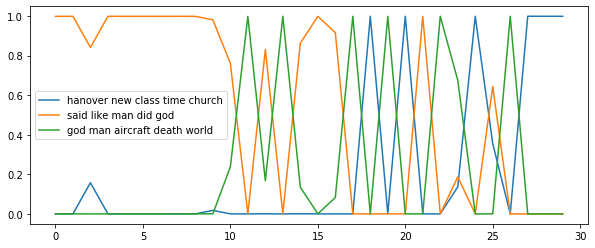

In [150]:
pd.DataFrame(ldaOut, columns=topicLabelsWords).plot(figsize=(10,4))
